<a href="https://colab.research.google.com/github/Helena26-ai/Rainforcement_project/blob/Antek/DQN_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

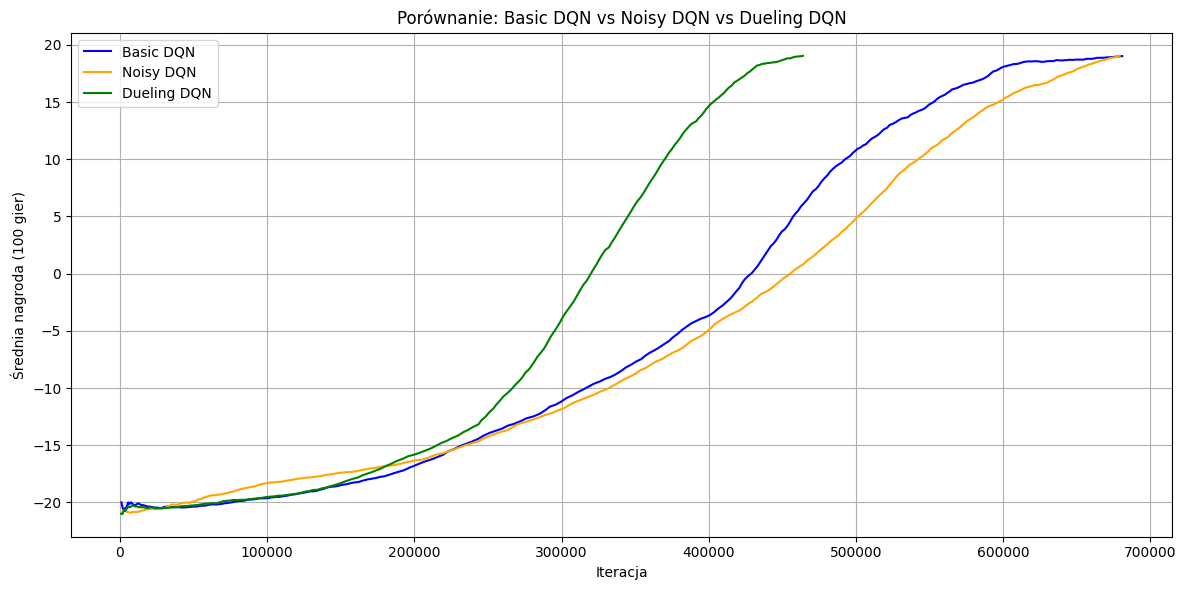

In [ ]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt

# Ścieżki do plików eventów
event_files = [
    "events.out.tfevents.b1_1746122355.8378f60791a4.14205.1",  # basic DQN
    "events.out.tfevents.n1_1747219737.3b6abca05ebf.742.1",    # noisy DQN
    "events.out.tfevents.d1_1747086736.bd7dd31dd113.2455.0"    # dueling DQN
]
labels = ["Basic DQN", "Noisy DQN", "Dueling DQN"]
colors = ["blue", "orange", "green"]  # Możesz zmienić, jeśli chcesz

plt.figure(figsize=(12, 6))
for event_file, label, color in zip(event_files, labels, colors):
    ea = event_accumulator.EventAccumulator(event_file)
    ea.Reload()
    try:
        rewards = ea.Scalars("reward_100")
        steps = [s.step for s in rewards]
        reward_values = [s.value for s in rewards]
        plt.plot(steps, reward_values, label=label, color=color)
    except KeyError:
        print(f"⚠️ Nie znaleziono danych 'reward_100' w pliku: {event_file}")

plt.xlabel("Iteracja")
plt.ylabel("Średnia nagroda (100 gier)")
plt.title("Porównanie: Basic DQN vs Noisy DQN vs Dueling DQN")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("porownanie_dqn_100.png")
plt.show()
